Mounting the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Importing all neccessary packages

In [ ]:
import numpy as np
from keras.utils import to_categorical
#import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2
from sklearn.model_selection import train_test_split


In [ ]:
import os
#os.path.exists('/content/src/')
os.chdir('/content/drive/My Drive/')
currentDirectory = os.getcwd()
print(currentDirectory)


/content/drive/My Drive


Loading the training and test dataset

In [ ]:
train_X = numpy.genfromtxt('/content/drive/My Drive/app/data/X.txt', delimiter=",", dtype=numpy.uint8);
train_Y = numpy.genfromtxt('/content/drive/My Drive/app/data/Y.txt', delimiter=",", dtype=numpy.uint8);
print(train_X.shape)
print(train_Y.shape)
classes = np.unique(train_Y)
nClasses = len(classes)
print(nClasses)

In [ ]:
print(train_X.shape)
print(train_Y.shape)
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

train_X = train_X.reshape(-1, 80,100, 1)
#test_X = test_X.reshape(-1, 28,28, 1)
#train_X.shape, test_X.shape

train_X = train_X.astype('float32')
#test_X = test_X.astype('float32')
train_X = train_X / 255.
#test_X = test_X / 255.

train_Y_one_hot = to_categorical(train_Y)
#test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding

  #print('Original label:', train_Y[0])
  #print('After conversion to one-hot:', train_Y_one_hot[0])

# To avoid overfitting, cross validation

print("Before taking the validation:",  train_X.shape)

# taking validation data
train_X,valid_X,train_label1,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
# Taking test data
print("After the Validation", train_X.shape)
train_X,test_X,train_label,test_label = train_test_split(train_X, train_label1, test_size=0.2, random_state=13)

print("After the test", train_X.shape)

#print(valid_X.shape)
#print(train_label.shape),print(valid_label.shape)
batch_size = 64
epochs = 100
num_classes = 36


(742, 8000)
(742,)
Total number of outputs :  36
Output classes :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]
Before taking the validation: (742, 80, 100, 1)
After the Validation (593, 80, 100, 1)
After the test (474, 80, 100, 1)


Model Configuration

In [ ]:
num_features = 60
OCR_model = Sequential()
OCR_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(80,100,1), data_format='channels_last', kernel_regularizer=l2(0.01)))
OCR_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
OCR_model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
OCR_model.add(Dropout(0.1))

OCR_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
OCR_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
OCR_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
OCR_model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

OCR_model.add(Conv2D(96, kernel_size=(3, 3), activation='relu', padding='same'))
OCR_model.add(Conv2D(96, kernel_size=(3, 3), activation='relu', padding='same'))
OCR_model.add(Conv2D(96, kernel_size=(3, 3), activation='relu', padding='same'))
OCR_model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

OCR_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
OCR_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
OCR_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
OCR_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
OCR_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
OCR_model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

OCR_model.add(Flatten())

OCR_model.add(Dense(1024, activation='linear'))
OCR_model.add(Dense(1024, activation='linear'))


OCR_model.add(Dense(num_classes+1, activation='softmax'))

Compiling the Model

In [ ]:
print('Compiling The mode')
OCR_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



Compiling The mode




Fitting The model

In [ ]:
OCR_train = OCR_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 474 samples, validate on 149 samples
Epoch 1/100





474/474 [==============================] - 12s 25ms/step - loss: 3.6888 - acc: 0.0148 - val_loss: 3.6324 - val_acc: 0.0268
Epoch 2/100
474/474 [==============================] - 1s 3ms/step - loss: 3.6211 - acc: 0.0359 - val_loss: 3.6457 - val_acc: 0.0134
Epoch 3/100
474/474 [==============================] - 1s 3ms/step - loss: 3.6118 - acc: 0.0295 - val_loss: 3.6452 - val_acc: 0.0268
Epoch 4/100
474/474 [==============================] - 1s 3ms/step - loss: 3.5998 - acc: 0.0338 - val_loss: 3.6647 - val_acc: 0.0268
Epoch 5/100
474/474 [==============================] - 1s 3ms/step - loss: 3.5922 - acc: 0.0316 - val_loss: 3.6864 - val_acc: 0.0134
Epoch 6/100
474/474 [==============================] - 1s 3ms/step - loss: 3.5923 - acc: 0.0359 - val_loss: 3.6637 - val_acc: 0.0134
Epoch 7/100
474/474 [==============================]

Plotting Confusion Matrices

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<Figure size 432x288 with 0 Axes>

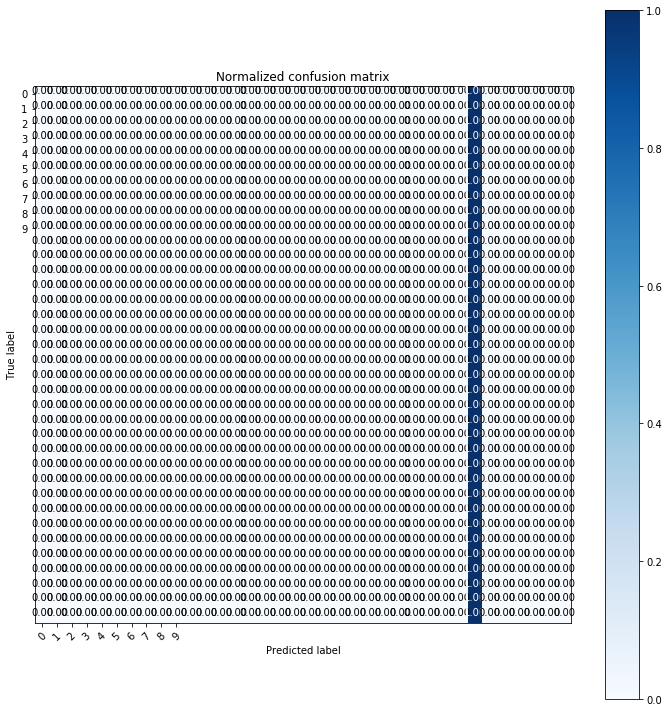

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pylab as plt
import numpy as np

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
y_pred = OCR_model.predict(test_X)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_label, axis=1)

confusion_mat = confusion_matrix(y_true, y_pred_classes)
# plot the confusion matrix
# plot normalized confusion matrix
conf = confusion_mat  *100
print(conf)
plt.figure()
plot_confusion_matrix(confusion_mat, classes = range(10), title='Normalized confusion matrix')
plt.show()


Evaluation of the model

In [ ]:
test_eval = OCR_model.evaluate(test_X, test_label, verbose=0)
train_eval = OCR_model.evaluate(train_X, train_label, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])
print('train loss:', train_eval[0])
print('train accuracy:', train_eval[1])


Test loss: 3.649356439334004
Test accuracy: 0.01680672268907563
train loss: 3.566316655919522
train accuracy: 0.03586497906013883
